In [1]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from jsonlines import jsonlines

from IPython.display import display, Markdown
from pprint import pprint

from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv



In [2]:
musique_dir = '../musique/musique/'


In [86]:
import panel as pn
pn.extension()

# Explore

### Data JSONLines

In [38]:
with jsonlines.open(musique_dir + 'data/musique_full_v1.0_train.jsonl') as reader:
    num_lines = sum(1 for _ in reader)

print(f'Number of lines in the file: {num_lines}')


Number of lines in the file: 39876


In [3]:
with jsonlines.open(musique_dir + '/data/musique_full_v1.0_train.jsonl') as reader:
    lines = [reader.read() for _ in range(1000)]
display(Markdown('**Line Example**'), pprint(lines[1]))


{'answer': 'north',
 'answer_aliases': ['North', 'N'],
 'answerable': True,
 'id': '2hop__269805_135710',
 'paragraphs': [{'idx': 0,
                 'is_supporting': False,
                 'paragraph_text': 'Milton F. Pavlic (1909–1942) was a United '
                                   'States Navy officer killed in action '
                                   'during World War II for whom a U.S. Navy '
                                   'high-speed transport was named.',
                 'title': 'Milton F. Pavlic'},
                {'idx': 1,
                 'is_supporting': False,
                 'paragraph_text': 'Osmund Holm-Hansen (also known as Oz '
                                   'Holm-Hansen) is a Norwegian-born American '
                                   'scientist, for whom Mount Holm-Hansen, in '
                                   'Antarctica is named. A plant physiologist '
                                   'by training, from 1962 Holm-Hansen was the '
           

**Line Example**

None

### Answerable/unanswerable lines

In [96]:
unanswerable_lines = [line for line in lines if not line['answerable']]
num_unanswerable_lines = len(unanswerable_lines)
print(f'Number of unanswerable lines: {num_unanswerable_lines}')


Number of unanswerable lines: 494


In [5]:
lines[-2]

{'id': '2hop__604134_131944',
 'paragraphs': [{'idx': 0,
   'title': 'Commonwealth of the Philippines',
   'paragraph_text': "The Commonwealth of the Philippines (; ) was the administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country. It replaced the Insular Government, a United States territorial government, and was established by the Tydings–McDuffie Act. The Commonwealth was designed as a transitional administration in preparation for the country's full achievement of independence.",
   'is_supporting': False},
  {'idx': 1,
   'title': 'Lake Oesa',
   'paragraph_text': 'Lake Oesa is a body of water located at an elevation of 2,267m (7438 ft) in the mountains of Yoho National Park, near Field, British Columbia, Canada.',
   'is_supporting': False},
  {'idx': 2,
   'title': 'Arafura Swamp',
   'paragraph_text': 'The Arafura Swamp is a large inland freshwater wetland in Arnh

### Tokenizer

In [98]:
import tiktoken

display(Markdown('**Token models**'), tiktoken.model.MODEL_TO_ENCODING)
tokenizer = tiktoken.encoding_for_model('gpt-3.5-turbo')
display(Markdown('**Tokenizer we are using**'), tokenizer)


**Token models**

{'gpt-4': 'cl100k_base',
 'gpt-3.5-turbo': 'cl100k_base',
 'gpt-3.5': 'cl100k_base',
 'gpt-35-turbo': 'cl100k_base',
 'davinci-002': 'cl100k_base',
 'babbage-002': 'cl100k_base',
 'text-embedding-ada-002': 'cl100k_base',
 'text-embedding-3-small': 'cl100k_base',
 'text-embedding-3-large': 'cl100k_base',
 'text-davinci-003': 'p50k_base',
 'text-davinci-002': 'p50k_base',
 'text-davinci-001': 'r50k_base',
 'text-curie-001': 'r50k_base',
 'text-babbage-001': 'r50k_base',
 'text-ada-001': 'r50k_base',
 'davinci': 'r50k_base',
 'curie': 'r50k_base',
 'babbage': 'r50k_base',
 'ada': 'r50k_base',
 'code-davinci-002': 'p50k_base',
 'code-davinci-001': 'p50k_base',
 'code-cushman-002': 'p50k_base',
 'code-cushman-001': 'p50k_base',
 'davinci-codex': 'p50k_base',
 'cushman-codex': 'p50k_base',
 'text-davinci-edit-001': 'p50k_edit',
 'code-davinci-edit-001': 'p50k_edit',
 'text-similarity-davinci-001': 'r50k_base',
 'text-similarity-curie-001': 'r50k_base',
 'text-similarity-babbage-001': 'r50k_b

**Tokenizer we are using**

<Encoding 'cl100k_base'>

In [99]:
test_line = lines[1]
test_paragraphs = test_line['paragraphs']

display(Markdown('**Paragraph Example**'), test_paragraphs[0])
test_tokens = tokenizer.encode(test_paragraphs[0]['paragraph_text'])
display(Markdown('**Tokens**'), test_tokens)
display(Markdown('**Number of Tokens**'), len(test_tokens))



**Paragraph Example**

{'idx': 0,
 'title': 'Milton F. Pavlic',
 'paragraph_text': 'Milton F. Pavlic (1909–1942) was a United States Navy officer killed in action during World War II for whom a U.S. Navy high-speed transport was named.',
 'is_supporting': False}

**Tokens**

[44,
 16695,
 435,
 13,
 43856,
 416,
 320,
 7028,
 24,
 4235,
 6393,
 17,
 8,
 574,
 264,
 3723,
 4273,
 19574,
 9640,
 7577,
 304,
 1957,
 2391,
 4435,
 5111,
 8105,
 369,
 8884,
 264,
 549,
 815,
 13,
 19574,
 1579,
 30699,
 7710,
 574,
 7086,
 13]

**Number of Tokens**

39

In [100]:
for paragraph in test_paragraphs:
    paragraph_text = paragraph['paragraph_text']
    paragraph_tokens = tokenizer.encode(paragraph_text)
    print(f'Number of tokens in paragraph: {len(paragraph_tokens)}')

Number of tokens in paragraph: 39
Number of tokens in paragraph: 68
Number of tokens in paragraph: 45
Number of tokens in paragraph: 64
Number of tokens in paragraph: 59
Number of tokens in paragraph: 131
Number of tokens in paragraph: 176
Number of tokens in paragraph: 59
Number of tokens in paragraph: 71
Number of tokens in paragraph: 86
Number of tokens in paragraph: 42
Number of tokens in paragraph: 36
Number of tokens in paragraph: 102
Number of tokens in paragraph: 61
Number of tokens in paragraph: 58
Number of tokens in paragraph: 57
Number of tokens in paragraph: 39
Number of tokens in paragraph: 35
Number of tokens in paragraph: 59
Number of tokens in paragraph: 48


In [198]:
pn.pane.JSON(lines[200])

BokehModel(combine_events=True, render_bundle={'docs_json': {'f1b6c2fe-fe68-44c0-9933-7af9a19ea774': {'version…

### Prediction format

In [102]:
display(Markdown('**Examples of predictions**'))
with jsonlines.open(musique_dir + 'predictions/musique_ans_v1.0_dev_end2end_model_predictions.jsonl', 'r') as file:
    for i in range(5):
        display(pprint(file.read()))

**Examples of predictions**

{'id': '2hop__460946_294723',
 'predicted_answer': 'Jennifer Garner',
 'predicted_answerable': True,
 'predicted_support_idxs': [0, 10]}


None

{'id': '2hop__252311_366220',
 'predicted_answer': 'Steven Spielberg',
 'predicted_answerable': True,
 'predicted_support_idxs': [10, 18]}


None

{'id': '2hop__701895_752697',
 'predicted_answer': 'Cypriot part was merged into the Bank of Cyprus '
                     '(including insured deposits under 100,000 Euro) and the '
                     "'bad' part or legacy entity holds all the overseas "
                     'operations as well as uninsured deposits above 100,000 '
                     'Euro, old shares and bonds. The uninsured depositors '
                     'were subject to a bail-in and became the new '
                     'shareholders of the legacy entity. As at May 2017, the '
                     'legacy entity is one of the largest shareholders of Bank '
                     'of Cyprus with 4.8% but does not hold a board seat. All '
                     'the overseas operations, of the now defunct Cyprus '
                     'Popular Bank, are also held by the legacy entity, until '
                     'they are sold by the Special Administrator, at first Ms '
                     'Andri Antoniadou, who

None

{'id': '2hop__259228_793698',
 'predicted_answer': 'Fairfield, Connecticut. Its main offices are located at '
                     '30 Rockefeller Plaza at Rockefeller Center in New York '
                     'City, known now as the Comcast Building. It was formerly '
                     'known as the GE Building for the prominent GE logo on '
                     "the roof; NBC's headquarters and main studios are also "
                     'located in the building. Through its RCA subsidiary, it '
                     'has been associated with the center since its '
                     'construction in the 1930s. GE moved its corporate '
                     'headquarters from the GE Building on Lexington Avenue to '
                     'Fairfield in 1974. [[PP]] The lander is named after the '
                     'Philae obelisk, which bears a bilingual inscription and '
                     'was used along with the Rosetta Stone to decipher '
                     'Egyptian hie

None

{'id': '2hop__481349_302087',
 'predicted_answer': 'Bombardier Inc. the former CRJ100 and CRJ200 series are '
                     'no longer in production but still in active airline '
                     'service, while the more recent CRJ700, CRJ900 and '
                     'CRJ1000 series are in production and in service. [[PP]] '
                     'Products offered through the Great Value brand are often '
                     'claimed to be as good as national brand offerings, but '
                     'are typically sold at a lower price because of lower '
                     'marketing and advertising expense. As a house or store '
                     'brand, the Great Value line does not consist of goods '
                     'produced by Walmart, but is a labeling system for items '
                     'manufactured and packaged by a number of agricultural '
                     'and food corporations, such as ConAgra, Sara Lee which, '
                     'in add

None

# Doc loading and splitting

In [103]:
lines[-2]

{'id': '2hop__604134_131944',
 'paragraphs': [{'idx': 0,
   'title': 'Commonwealth of the Philippines',
   'paragraph_text': "The Commonwealth of the Philippines (; ) was the administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country. It replaced the Insular Government, a United States territorial government, and was established by the Tydings–McDuffie Act. The Commonwealth was designed as a transitional administration in preparation for the country's full achievement of independence.",
   'is_supporting': False},
  {'idx': 1,
   'title': 'Lake Oesa',
   'paragraph_text': 'Lake Oesa is a body of water located at an elevation of 2,267m (7438 ft) in the mountains of Yoho National Park, near Field, British Columbia, Canada.',
   'is_supporting': False},
  {'idx': 2,
   'title': 'Arafura Swamp',
   'paragraph_text': 'The Arafura Swamp is a large inland freshwater wetland in Arnh

In [104]:
paragraphs = lines[-2]['paragraphs']
paragraphs




[{'idx': 0,
  'title': 'Commonwealth of the Philippines',
  'paragraph_text': "The Commonwealth of the Philippines (; ) was the administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country. It replaced the Insular Government, a United States territorial government, and was established by the Tydings–McDuffie Act. The Commonwealth was designed as a transitional administration in preparation for the country's full achievement of independence.",
  'is_supporting': False},
 {'idx': 1,
  'title': 'Lake Oesa',
  'paragraph_text': 'Lake Oesa is a body of water located at an elevation of 2,267m (7438 ft) in the mountains of Yoho National Park, near Field, British Columbia, Canada.',
  'is_supporting': False},
 {'idx': 2,
  'title': 'Arafura Swamp',
  'paragraph_text': 'The Arafura Swamp is a large inland freshwater wetland in Arnhem Land, in the Top End of the Northern Territory of Au

In [105]:
import tiktoken

def token_len(text: str, model: str = "gpt-4") -> int:
    encoder = tiktoken.encoding_for_model(model)
    return len(encoder.encode(text))

pprint(paragraphs[0]['paragraph_text'])
print('Token length: ', token_len(paragraphs[0]['paragraph_text']))


('The Commonwealth of the Philippines (; ) was the administrative body that '
 'governed the Philippines from 1935 to 1946, aside from a period of exile in '
 'the Second World War from 1942 to 1945 when Japan occupied the country. It '
 'replaced the Insular Government, a United States territorial government, and '
 'was established by the Tydings–McDuffie Act. The Commonwealth was designed '
 "as a transitional administration in preparation for the country's full "
 'achievement of independence.')
Token length:  95


In [106]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=20, chunk_overlap=5, length_function=token_len)
splits0 = text_splitter.split_text(paragraphs[0]['paragraph_text'])
splits0_tups = [('Token length: ' + str(token_len(s)), s) for s in splits0]
splits1 = text_splitter.split_text(paragraphs[1]['paragraph_text'])
splits1_tups = [('Token length: ' + str(token_len(s)), s) for s in splits1]

display(Markdown('**Paragraph 1**'))
pprint(splits0_tups)
display(Markdown('**Paragraph 2**'))
display(splits1_tups)

**Paragraph 1**

[('Token length: 20',
  'The Commonwealth of the Philippines (; ) was the administrative body that '
  'governed the Philippines from 1935 to'),
 ('Token length: 20',
  'from 1935 to 1946, aside from a period of exile in the Second World War'),
 ('Token length: 20',
  'in the Second World War from 1942 to 1945 when Japan occupied the country. '
  'It'),
 ('Token length: 20',
  'occupied the country. It replaced the Insular Government, a United States '
  'territorial government, and was established'),
 ('Token length: 20',
  'government, and was established by the Tydings–McDuffie Act. The '
  'Commonwealth was designed'),
 ('Token length: 19',
  'The Commonwealth was designed as a transitional administration in '
  "preparation for the country's full achievement of independence.")]


**Paragraph 2**

[('Token length: 18',
  'Lake Oesa is a body of water located at an elevation of 2,267m'),
 ('Token length: 19',
  '2,267m (7438 ft) in the mountains of Yoho National Park, near'),
 ('Token length: 11', 'National Park, near Field, British Columbia, Canada.')]

# Prompting

In [28]:
from dotenv import load_dotenv
load_dotenv()

True

In [29]:
from langchain_anthropic import ChatAnthropic
chat_model = ChatAnthropic(model_name='claude-3-haiku-20240307')



In [10]:
#| code-fold: false

from dotenv import load_dotenv
from langchain_anthropic import ChatAnthropic

load_dotenv()

chat_model = ChatAnthropic(model_name='claude-3-haiku-20240307')
joke = chat_model.invoke("Tell me a mid joke about airplanes and horses")
display(joke)
joke.pretty_print()

AIMessage(content="Here's a mildly silly joke about airplanes and horses:\n\nWhy did the horse refuse to get on the airplane? Because it already had a stable flight plan!", response_metadata={'id': 'msg_01K9jCUru7b4TiBBC6eaWRxf', 'model': 'claude-3-haiku-20240307', 'stop_reason': 'end_turn', 'stop_sequence': None, 'usage': {'input_tokens': 18, 'output_tokens': 39}}, id='run-2cb963b0-3180-432e-95a7-368169c5bef0-0')

================================== Ai Message ==================================

Here's a mildly silly joke about airplanes and horses:

Why did the horse refuse to get on the airplane? Because it already had a stable flight plan!


In [16]:
#| code-fold: false

from pydantic import BaseModel, Field
from typing import Dict, List, Union, Tuple, Optional
import json

class Node(BaseModel):
    semantic_id: str = Field(..., description="The unique identifier of the node that is \
                             a reference to create edges between different nodes.")
    category: str = Field(..., description="The category of the node")
    attributes: Optional[Dict[str, Union[str, int, bool]]] = Field(None, description="Additional properties of the node")

class Edge(BaseModel):
    from_node: str = Field(..., description="The id of the node from which the edge originates. Only previously generated semantic_ids belong here, nothing else.")
    to_node: str = Field(..., description="The id of the node to which the edge connects. Only previously generated semantic_ids belong here, nothing else.")
    category: str = Field(..., description="The type of the relationship")
    attributes: Optional[Dict[str, Union[str, int, bool]]] = Field(None, description="Additional properties of the edge")

class Graph(BaseModel):
    nodes: List[Node] = Field(...,description="A list of nodes in the graph")
    edges: List[Edge] = Field(...,description="A list of edges in the graph")

Graph.model_json_schema()

{'$defs': {'Edge': {'properties': {'from_node': {'description': 'The id of the node from which the edge originates. Only previously generated semantic_ids belong here, nothing else.',
     'title': 'From Node',
     'type': 'string'},
    'to_node': {'description': 'The id of the node to which the edge connects. Only previously generated semantic_ids belong here, nothing else.',
     'title': 'To Node',
     'type': 'string'},
    'category': {'description': 'The type of the relationship',
     'title': 'Category',
     'type': 'string'},
    'attributes': {'anyOf': [{'additionalProperties': {'anyOf': [{'type': 'string'},
         {'type': 'integer'},
         {'type': 'boolean'}]},
       'type': 'object'},
      {'type': 'null'}],
     'default': None,
     'description': 'Additional properties of the edge',
     'title': 'Attributes'}},
   'required': ['from_node', 'to_node', 'category'],
   'title': 'Edge',
   'type': 'object'},
  'Node': {'properties': {'semantic_id': {'descriptio

In [109]:
#| code-fold: false

json_rules = \
"""We need to create a JSON object that contains a list of nodes and edges that connect the nodes.
Both, nodes and edges, have optional attributes.
Your goal is to extract as much pertinent information from the passage as possible and create nodes and edges with the extracted information.
If history is provided, it will be in the JSON schema you are given. You may create new connections between the nodes and edges in the history and the new nodes you are producing.
If you wish to change/update any of the node attributes in the provided history based on newly gathered information, simply reuse the semantic_ids of the nodes you wish to change.
If you wish to modify/update the edge attributes in the history, reuse the semantic_ids of the 'from' and 'to' nodes of any edge you wish to change.
Use the following schema and make sure to read the descriptions:
""" 

json_prompt_instructions = \
    json_rules + \
    json.dumps(Graph.model_json_schema()) + \
    "\n-----\n"

pprint(json_prompt_instructions)

('We need to create a JSON object that contains a list of nodes and edges that '
 'connect the nodes.\n'
 'Both, nodes and edges, have optional attributes.\n'
 'Your goal is to extract as much pertinent information from the passage as '
 'possible and create nodes and edges with the extracted information.\n'
 'If history is provided, it will be in the JSON schema you are given. You may '
 'create new connections between the nodes and edges in the history and the '
 'new nodes you are producing.\n'
 'If you wish to change/update any of the node attributes in the provided '
 'history based on newly gathered information, simply reuse the semantic_ids '
 'of the nodes you wish to change.\n'
 'If you wish to modify/update the edge attributes in the history, reuse the '
 "semantic_ids of the 'from' and 'to' nodes of any edge you wish to change.\n"
 'Use the following schema and make sure to read the descriptions:\n'
 '{"$defs": {"Edge": {"properties": {"from_node": {"description": "The id of

In [112]:
#| code-fold: false

graph_creator_content = \
"""You are a brilliant and efficient creator of JSON objects that capture the essence of passages and who follows instructions unbelievably well.
You will be first given instructions and a json schema, then you will be provided a passage to extract the information from.
You will only respond with valid JSON, nothing else.
Your instructions are:
{instructions}
History:
{history}
"""

In [110]:
#| code-fold: false

pass_passage_content = "Below is the passage to extract the values from.\n*****\nPassage:\n{passage}"

In [113]:
#| code-fold: false

from langchain_core.prompts import (
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)

graph_analyst_template = SystemMessagePromptTemplate.from_template(template=graph_creator_content,
                                                                   input_variables=['history', 'instructions'])
pass_passage_template = HumanMessagePromptTemplate.from_template(pass_passage_content, input_variables=['passage'])

gen_template = graph_analyst_template + pass_passage_template

gen_template.invoke({'passage': paragraphs[0]['paragraph_text'],
                     'history': '',
                     'instructions': json_prompt_instructions})



ChatPromptValue(messages=[SystemMessage(content='You are a brilliant and efficient creator of JSON objects that capture the essence of passages and who follows instructions unbelievably well.\nYou will be first given instructions and a json schema, then you will be provided a passage to extract the information from.\nYou will only respond with valid JSON, nothing else.\nYour instructions are:\nWe need to create a JSON object that contains a list of nodes and edges that connect the nodes.\nBoth, nodes and edges, have optional attributes.\nYour goal is to extract as much pertinent information from the passage as possible and create nodes and edges with the extracted information.\nIf history is provided, it will be in the JSON schema you are given. You may create new connections between the nodes and edges in the history and the new nodes you are producing.\nIf you wish to change/update any of the node attributes in the provided history based on newly gathered information, simply reuse th

# Testing without history

In [117]:
#| code-fold: false

load_dotenv()

chat_model = ChatAnthropic(model_name='claude-3-haiku-20240307')
# json_output_parser = JsonOutputParser()

llm_pipe = gen_template | chat_model

In [118]:
#| code-fold: false

response = llm_pipe.invoke({'passage': paragraphs[0]['paragraph_text'],
                 'history': '',
                 'instructions': json_prompt_instructions})

In [119]:
#| code-fold: false

pprint(response.content)

('{\n'
 '  "nodes": [\n'
 '    {\n'
 '      "semantic_id": "commonwealth_of_the_philippines",\n'
 '      "category": "administrative_body",\n'
 '      "attributes": {\n'
 '        "name": "Commonwealth of the Philippines",\n'
 '        "government_period": "1935 to 1946",\n'
 '        "purpose": "transitional administration in preparation for '
 'independence"\n'
 '      }\n'
 '    },\n'
 '    {\n'
 '      "semantic_id": "insular_government",\n'
 '      "category": "territorial_government",\n'
 '      "attributes": {\n'
 '        "name": "Insular Government",\n'
 '        "governed_by": "United States"\n'
 '      }\n'
 '    },\n'
 '    {\n'
 '      "semantic_id": "japan",\n'
 '      "category": "country",\n'
 '      "attributes": {\n'
 '        "name": "Japan",\n'
 '        "occupied_the_philippines": "1942 to 1945"\n'
 '      }\n'
 '    },\n'
 '    {\n'
 '      "semantic_id": "tydings_mcduffie_act",\n'
 '      "category": "legislation",\n'
 '      "attributes": {\n'
 '        "name": 

In [120]:
#| code-fold: false

from langchain_core.output_parsers import JsonOutputParser

json_output_parser = JsonOutputParser()
json_output_parser.invoke(response)

{'nodes': [{'semantic_id': 'commonwealth_of_the_philippines',
   'category': 'administrative_body',
   'attributes': {'name': 'Commonwealth of the Philippines',
    'government_period': '1935 to 1946',
    'purpose': 'transitional administration in preparation for independence'}},
  {'semantic_id': 'insular_government',
   'category': 'territorial_government',
   'attributes': {'name': 'Insular Government',
    'governed_by': 'United States'}},
  {'semantic_id': 'japan',
   'category': 'country',
   'attributes': {'name': 'Japan',
    'occupied_the_philippines': '1942 to 1945'}},
  {'semantic_id': 'tydings_mcduffie_act',
   'category': 'legislation',
   'attributes': {'name': 'Tydings–McDuffie Act',
    'established': 'Commonwealth of the Philippines'}}],
 'edges': [{'from_node': 'insular_government',
   'to_node': 'commonwealth_of_the_philippines',
   'category': 'replaced'},
  {'from_node': 'commonwealth_of_the_philippines',
   'to_node': 'japan',
   'category': 'occupied_by',
   'at

In [121]:
nodes_edges_json = json_output_parser.invoke(response)

In [122]:
#| code-fold: false

llm_pipe = gen_template | chat_model | json_output_parser

# Viz

In [320]:
nodes_edges_json

{'nodes': [{'semantic_id': 'commonwealth_of_the_philippines',
   'category': 'political_entity',
   'attributes': {'name': 'Commonwealth of the Philippines',
    'period': '1935 to 1946',
    'description': 'The administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country.'}},
  {'semantic_id': 'insular_government',
   'category': 'political_entity',
   'attributes': {'name': 'Insular Government',
    'description': 'The United States territorial government that was replaced by the Commonwealth of the Philippines.'}},
  {'semantic_id': 'tydings_mcduffie_act',
   'category': 'legislation',
   'attributes': {'name': 'Tydings–McDuffie Act',
    'description': 'The act that established the Commonwealth of the Philippines.'}},
  {'semantic_id': 'japan',
   'category': 'country',
   'attributes': {'name': 'Japan',
    'description': 'Occupied the Philippines during the Second World 

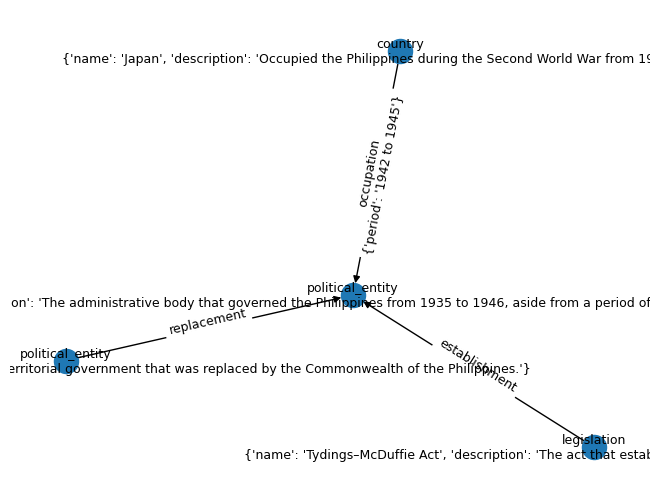

In [246]:
#| code-fold: false

import rustworkx as rx
from rustworkx.visualization import mpl_draw

# Create a directed graph
digraph = rx.PyDiGraph()

# Add nodes to the graph
node_indices = {}
for node in nodes_edges_json["nodes"]:
    idx = digraph.add_node(node)
    node_indices[node["semantic_id"]] = idx

# Add edges to the graph
for edge in nodes_edges_json["edges"]:
    from_idx = node_indices[edge["from_node"]]
    to_idx = node_indices[edge["to_node"]]
    digraph.add_edge(from_idx, to_idx, edge)

# Visualize the graph with labels based on node and edge categories
mpl_draw(digraph, with_labels=True,
         labels=lambda node: f'{node["category"]}\n{node.get("attributes", "")}',
         edge_labels=lambda edge: f'{edge["category"]}\n{edge.get("attributes", "")}',
         font_size=9)

# History management

In [7]:
import logging
import logging.config
import param
from collections import OrderedDict
from copy import deepcopy
from uuid import uuid4
import json
from typing import Union, List, Dict

with open('../logs/logging_config.json', 'r') as f:
    config = json.load(f)
logging.config.dictConfig(config)
logger = logging.getLogger('root')

class GraphHistory(param.Parameterized):
    nodes_alias = param.String('nodes')
    edges_alias = param.String('edges')
    history = param.Dict(default=OrderedDict())
    latest_history = param.Dict(default=OrderedDict(),
        doc="Generated when get_history_str is run; contains {uuid: {nodes|edges: {object}} mapping. \
            Meant to be used for managing the current history window and modifications")
    latest_history_mapping = param.Dict(default=OrderedDict(),
        doc="Maps semantic_id to uuid for the latest history items as well as the node pairs to an edge uuid")
    token_max = param.Integer(default=400)
    
    def add_history(self, new_items: Union[List, Dict], return_with_uuid: bool = True):
        """
        Nodes are added directly to the history with their UUIDs. 
        Edges are added only after their 'from_node' and 'to_node' fields are set to the corresponding
        node UUIDs. This ensures that edges reference the correct nodes in the graph.
        """
        new_items = deepcopy(new_items)
        if isinstance(new_items, dict):
            new_items = [new_items]  # Ensure new_items is always a list for consistency
        history_list = []
        for item in new_items:
            item_type = self.nodes_alias if self.nodes_alias in item else self.edges_alias
            # Makes it easier to work with the inner dict of {nodes|edges: {*inner_dict*}}
            item_dict = item[item_type]
            if item_type == self.nodes_alias:  # Handling nodes
                # If node exists in latest_history, we want to modify it and move it to the bottom in history
                # No need to add to latest_history, since it won't be used since item exists in it already, and will be reset on next get_history_str call
                if item_dict['semantic_id'] in self.latest_history_mapping:
                    uuid_gen = self.latest_history_mapping[item_dict['semantic_id']]
                    self.history[uuid_gen] = item
                    self.history.move_to_end(uuid_gen)
                    logger.debug(f"Node exists in latest_history, moving to end of history: {uuid_gen}: {item}")
                else:
                    uuid_gen = uuid4()
                    self.history[uuid_gen] = item
                    logger.debug(f"Added node to history: {str(uuid_gen)}: {item}")
                    self.latest_history[uuid_gen] = item
                    self.latest_history_mapping[item_dict['semantic_id']] = uuid_gen
                if return_with_uuid:
                    history_list.append((str(uuid_gen), item))
                else:
                    history_list.append(item)
            else:  # Handling edges
                from_semantic_id = item_dict['from_node']
                to_semantic_id = item_dict['to_node']
                # Ensure 'from_node' and 'to_node' reference the correct UUIDs from the recently added nodes
                # TODO Add exception handling for when the LLM thinks that a node exists when it doesn't. Try, except
                try:
                    item_dict['from_node'] = self.latest_history_mapping[from_semantic_id]
                    item_dict['to_node'] = self.latest_history_mapping[to_semantic_id]
                except KeyError:
                    print(f"KeyError: {from_semantic_id} or {to_semantic_id} not found in latest_history_mapping")
                    continue
                # If the edge is in the latest history according to its from and to nodes, then we update it
                if (from_to_tuple:=(item_dict['from_node'], item_dict['to_node'])) in self.latest_history_mapping:
                    uuid_gen = self.latest_history_mapping[from_to_tuple]
                    self.history[uuid_gen] = item
                    self.history.move_to_end(uuid_gen)
                    logger.debug(f"Edge exists in latest_history_mapping, moving to end of history: {uuid_gen}: {item}")
                else:
                    uuid_gen = uuid4()
                    self.history[uuid_gen] = item
                    logger.debug(f"Added edge to history: {str(uuid_gen)}: {item}")
                if return_with_uuid:
                    history_list.append((str(uuid_gen), item))
                else:
                    history_list.append(item)
        return deepcopy(history_list[0]) if len(history_list) == 1 else deepcopy(history_list)
    
    def get_history_window(self, token_max: int = None):
        if token_max is None:
            token_max = self.token_max  # Use default token_max if not specified
        self.latest_history.clear()  # Clear the latest history for a fresh start
        self.latest_history_mapping.clear()  # Also clear the latest history mapping
        logger.debug(f"Cleared latest_history_mapping and latest_history")
        token_tracking = 0
        for uuid, item in reversed(self.history.items()):
            item_type = self.nodes_alias if self.nodes_alias in item else self.edges_alias
            item_dict = item[item_type]
            token_tracking += token_len(self._item_to_json_str(deepcopy(item)))
            if token_tracking < token_max:
                self.latest_history[uuid] = item  # Update latest_history with the current item
                if item_type == self.nodes_alias:
                    self.latest_history_mapping[item_dict['semantic_id']] = uuid  # Update latest_history_mapping
                    logger.debug(f"Added node to latest_history_mapping: {item_dict['semantic_id']}: {uuid}")
                elif item_type == self.edges_alias:
                    self.latest_history_mapping[(item_dict['from_node'], item_dict['to_node'])] = uuid
                    logger.debug(f"Added edge to latest_history_mapping: ({item_dict['from_node']}, {item_dict['to_node']}): {uuid}")
            else:
                break  # Stop adding items if token_max is reached
        return deepcopy(self.latest_history)  # Return the history as a string

    def _item_to_json_str(self, item):
        item_type = self.nodes_alias if self.nodes_alias in item else self.edges_alias
        item_dict = item[item_type]
        if item_type == self.edges_alias:
            item_dict['from_node'] = self.history[item_dict['from_node']][self.nodes_alias]['semantic_id']
            item_dict['to_node'] = self.history[item_dict['to_node']][self.nodes_alias]['semantic_id']
        return json.dumps(item_dict)
            
    def get_history_str(self, token_max: int = None):
        """
        Returns a history string based on the token length specification and updates the latest_history
        """
        latest_history = self.get_history_window(token_max)
        json_list = []
        for uuid, item in latest_history.items():
            json_list.append(self._item_to_json_str(item))
        if json_list:
            json_str = "\n".join(json_list)
            logger.debug(f"JSON History string created: {json_str}")
            return json_str

In [22]:
from langchain.output_parsers import OutputFixingParser


In [128]:
#| code-fold: false

from json import JSONDecodeError
import time

from anthropic import RateLimitError
from langchain.output_parsers import OutputFixingParser

splitter = RecursiveCharacterTextSplitter(chunk_size=70, chunk_overlap=20, length_function=token_len)

json_fixing_parser = OutputFixingParser.from_llm(parser=json_output_parser, llm=chat_model, max_retries=3)

llm_pipe = gen_template | chat_model | json_fixing_parser
graph_history = GraphHistory()

graph_components = []
for paragraph in paragraphs:
    splits = splitter.split_text(paragraph['paragraph_text'])
    for split in splits:
        local_history = graph_history.get_history_str(token_max=600)
        try:
            response = llm_pipe.invoke(
                {'passage': split,
                'history': local_history,
                'instructions': json_prompt_instructions})
        except RateLimitError as e:
            print(e)
            time.sleep(60)  # Wait for a minute
            response = llm_pipe.invoke(
                {'passage': split,
                'history': local_history,
                'instructions': json_prompt_instructions})
            continue
        if 'nodes' in response:
            for node in response['nodes']:
                if 'semantic_id' not in node:
                    continue
                node['paragraph_idx'] = paragraph['idx']
                graph_history.add_history({'nodes': node}, return_with_uuid=False)
        if 'edges' in response:
            for edge in response['edges']:
                graph_history.add_history({'edges': edge}, return_with_uuid=False)

        graph_components.append(response)

2024-04-22 23:20:21,560 - DEBUG - root - 1783301770 - get_history_window - 90 - Cleared latest_history_mapping and latest_history
2024-04-22 23:20:28,404 - DEBUG - root - 1783301770 - add_history - 51 - Added node to history: 7c74cbd4-d37e-48ee-b07b-8e743cb4e571: {'nodes': {'semantic_id': 'philippines-commonwealth', 'category': 'government', 'attributes': {'name': 'Commonwealth of the Philippines', 'duration': '1935 - 1946', 'status': 'replaced the Insular Government', 'description': 'The administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country.'}, 'paragraph_idx': 0}}
2024-04-22 23:20:28,404 - DEBUG - root - 1783301770 - add_history - 51 - Added node to history: 45454413-bccb-4305-b606-2fa6386a64b6: {'nodes': {'semantic_id': 'insular-government', 'category': 'government', 'attributes': {'name': 'Insular Government', 'type': 'United States territorial government', 'replace

KeyError: silver-lake or minnewawa-brook not found in latest_history_mapping
KeyError: minnewawa-brook or the-branch not found in latest_history_mapping
KeyError: the-branch or ashuelot-river not found in latest_history_mapping
KeyError: ashuelot-river or connecticut-river not found in latest_history_mapping


2024-04-22 23:20:58,031 - DEBUG - root - 1783301770 - add_history - 51 - Added node to history: b325368a-939a-4b13-bc90-bb48ffa68859: {'nodes': {'semantic_id': 'hyderabad-police-area', 'category': 'location', 'attributes': {'name': 'Hyderabad Police area', 'size': 'smallest'}, 'paragraph_idx': 6}}
2024-04-22 23:20:58,031 - DEBUG - root - 1783301770 - add_history - 51 - Added node to history: c01036cf-69f0-4589-a53f-c967eb829736: {'nodes': {'semantic_id': 'hyderabad-district', 'category': 'location', 'attributes': {'name': 'Hyderabad district', 'size': 'larger than Hyderabad Police area'}, 'paragraph_idx': 6}}
2024-04-22 23:20:58,032 - DEBUG - root - 1783301770 - add_history - 51 - Added node to history: 50db0180-d74c-4009-8812-aad530beef99: {'nodes': {'semantic_id': 'ghmc-area', 'category': 'location', 'attributes': {'name': 'GHMC area', 'alias': 'Hyderabad city', 'size': 'larger than Hyderabad district'}, 'paragraph_idx': 6}}
2024-04-22 23:20:58,032 - DEBUG - root - 1783301770 - add_h

KeyError: veteran-banker or treasury not found in latest_history_mapping


2024-04-22 23:22:58,703 - DEBUG - root - 1783301770 - add_history - 47 - Node exists in latest_history, moving to end of history: 7b7ab7bd-43ab-4a85-a863-587230a60496: {'nodes': {'semantic_id': 'legacy-entity', 'category': 'organization', 'attributes': {'name': 'Legacy entity of Cyprus Popular Bank', 'description': 'Holds all the overseas operations of the now defunct Cyprus Popular Bank, until they are sold by the Special Administrator'}, 'paragraph_idx': 19}}
2024-04-22 23:22:58,704 - DEBUG - root - 1783301770 - add_history - 47 - Node exists in latest_history, moving to end of history: 3b46a61b-149b-4102-afd7-da851e1dda5c: {'nodes': {'semantic_id': 'veteran-banker', 'category': 'person', 'attributes': {'name': 'Chris Pavlou', 'expertise': 'expert in Treasury'}, 'paragraph_idx': 19}}
2024-04-22 23:22:58,704 - DEBUG - root - 1783301770 - add_history - 47 - Node exists in latest_history, moving to end of history: 883c8cec-7a77-44ff-9d5d-0aefda29ce21: {'nodes': {'semantic_id': 'special-

In [406]:
token = 0
runs = 0
for paragraph in paragraphs:
    splits = splitter.split_text(paragraph['paragraph_text'])
    for split in splits:
        token += token_len(split)
        runs += 1
token, runs


(2565, 43)

In [50]:
#| code-fold: false

graph_history.history

OrderedDict([(UUID('acc73dc0-d5ae-499e-8cc4-63f70f2d935f'),
              {'nodes': {'semantic_id': 'insular_government',
                'category': 'political_entity',
                'attributes': {'name': 'Insular Government',
                 'description': 'A United States territorial government that was replaced by the Commonwealth of the Philippines.'}}}),
             (UUID('38d26bc0-e096-4524-945a-77b9e4ae0f49'),
              {'nodes': {'semantic_id': 'commonwealth_of_the_philippines',
                'category': 'political_entity',
                'attributes': {'name': 'Commonwealth of the Philippines',
                 'years_active': '1935 to 1946',
                 'description': 'The administrative body that governed the Philippines during this period, except for a period of exile from 1942 to 1945 when Japan occupied the country.'}}}),
             (UUID('9555e806-1679-4bc0-99d7-55717f21bdef'),
              {'nodes': {'semantic_id': 'tydings_mcduffie_act',
          

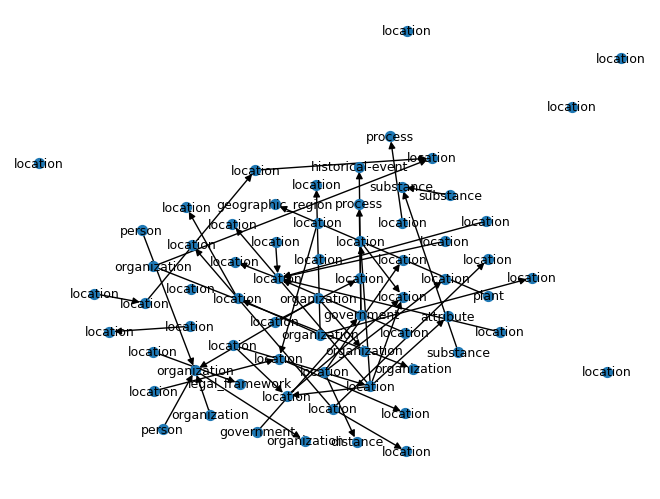

In [172]:
#| code-fold: false

import rustworkx as rx
from rustworkx.visualization import mpl_draw

digraph = rx.PyDiGraph()

node_indices = {}
# Iterate through the history to add nodes and edges
for uuid, data in graph_history.history.items():
    if 'nodes' in data:
        # Add node to the graph and store the index with its UUID
        node_index = digraph.add_node(data['nodes'])
        node_indices[uuid] = node_index

for uuid, data in graph_history.history.items():
    if 'edges' in data:
        # Retrieve indices of the from and to nodes using their UUIDs
        from_index = node_indices.get(data['edges']['from_node'])
        to_index = node_indices.get(data['edges']['to_node'])
        if from_index is not None and to_index is not None:
            # Add edge to the graph
            digraph.add_edge(from_index, to_index, data['edges'])

# Visualize the graph with labels based on node and edge categories
layout = rx.digraph_spring_layout(digraph, repulsive_exponent=50, num_iter=200)
mpl_draw(digraph, with_labels=True, pos=layout,
         labels=lambda node: f'{node["category"]}',
        #  edge_labels=lambda edge: f'{edge["category"]}',
         font_size=9, node_size=50)

In [81]:
#| code-fold: false

len_list = [len(digraph.incident_edges(n, all_edges=True)) for n in range(len(digraph.node_indices()))]
len_list.sort(reverse=True)
len_list[:]

[9,
 5,
 5,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [80]:
from collections import Counter

# Count the occurrences of each length in len_list and sort them by length
counted_lengths = sorted(Counter(len_list).items())
counted_lengths


[(0, 7), (1, 34), (2, 15), (3, 1), (4, 2), (5, 2), (9, 1)]

In [382]:
edge_lens = [len(g['edges']) for g in graph_components]

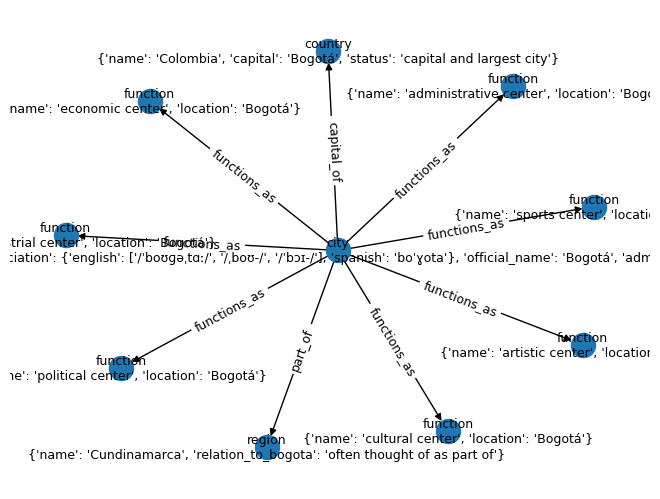

In [71]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

# Assuming 'graph' is your existing PyDiGraph object
node_index = 35  # Example node index

# Get predecessors and successors
predecessors = list(digraph.predecessor_indices(node_index))
successors = list(digraph.successor_indices(node_index))

# Include the original node and ensure uniqueness of nodes
subgraph_nodes = list(set([node_index] + predecessors + successors))

# Create the subgraph
subgraph = digraph.subgraph(subgraph_nodes)


# Visualize the graph with labels based on node and edge categories
mpl_draw(subgraph, with_labels=True,
         labels=lambda node: f'{node["category"]}\n{node.get("attributes", "")}',
         edge_labels=lambda edge: f'{edge["category"]}',
         font_size=9)

In [387]:
len_list = [len(digraph.incident_edges(n, all_edges=True)) for n in range(len(digraph.node_indices()))]
len_list

[9, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [414]:
import pickle

# Pickle the graph components
with open('graph_components.pkl', 'wb') as f:
    pickle.dump(graph_components, f)

# Pickle the graph history
with open('graph_history.pkl', 'wb') as f:
    pickle.dump(graph_history, f)


In [8]:
import pickle

# Read the pickled graph components
with open('graph_components.pkl', 'rb') as f:
    graph_components0 = pickle.load(f)

# Read the pickled graph history
with open('graph_history.pkl', 'rb') as f:
    graph_history0 = pickle.load(f)


In [9]:
graph_history0.history

OrderedDict([(UUID('acc73dc0-d5ae-499e-8cc4-63f70f2d935f'),
              {'nodes': {'semantic_id': 'insular_government',
                'category': 'political_entity',
                'attributes': {'name': 'Insular Government',
                 'description': 'A United States territorial government that was replaced by the Commonwealth of the Philippines.'}}}),
             (UUID('38d26bc0-e096-4524-945a-77b9e4ae0f49'),
              {'nodes': {'semantic_id': 'commonwealth_of_the_philippines',
                'category': 'political_entity',
                'attributes': {'name': 'Commonwealth of the Philippines',
                 'years_active': '1935 to 1946',
                 'description': 'The administrative body that governed the Philippines during this period, except for a period of exile from 1942 to 1945 when Japan occupied the country.'}}}),
             (UUID('9555e806-1679-4bc0-99d7-55717f21bdef'),
              {'nodes': {'semantic_id': 'tydings_mcduffie_act',
          

In [7]:
graph_components0

[{'nodes': [{'semantic_id': 'commonwealth_of_the_philippines',
    'category': 'political_entity',
    'attributes': {'name': 'Commonwealth of the Philippines',
     'years_active': '1935 to 1946',
     'description': 'The administrative body that governed the Philippines during this period, except for a period of exile from 1942 to 1945 when Japan occupied the country.'},
    'paragraph_idx': 0},
   {'semantic_id': 'insular_government',
    'category': 'political_entity',
    'attributes': {'name': 'Insular Government',
     'description': 'A United States territorial government that was replaced by the Commonwealth of the Philippines.'},
    'paragraph_idx': 0}],
  'edges': [{'from_node': 'insular_government',
    'to_node': 'commonwealth_of_the_philippines',
    'category': 'replaced'}]},
 {'nodes': [{'semantic_id': 'insular_government',
    'category': 'political_entity',
    'attributes': {'name': 'Insular Government',
     'description': 'A United States territorial government th

# Creating Vector DB

In [10]:
#| code-fold: false

import chromadb

2024-05-14 21:56:41,453 - DEBUG - chromadb.auth.registry - registry - decorator - 56 - Registering provider: token_config
2024-05-14 21:56:41,455 - DEBUG - chromadb.auth.registry - registry - decorator - 56 - Registering provider: user_token_config
2024-05-14 21:56:41,456 - DEBUG - chromadb.auth.registry - registry - decorator - 56 - Registering provider: token
2024-05-14 21:56:41,458 - DEBUG - chromadb.auth.registry - registry - decorator - 56 - Registering provider: token


In [11]:
#| code-fold: false

from chromadb.utils import embedding_functions

ef = embedding_functions.DefaultEmbeddingFunction()


In [9]:
#| code-fold: false

ef('sup')

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [01:21<00:00, 1.02MiB/s]


[[-0.08815008401870728,
  0.0389120951294899,
  -0.06267453730106354,
  0.025976944714784622,
  0.021272214129567146,
  0.036165427416563034,
  0.06472509354352951,
  0.03273024782538414,
  -0.022812241688370705,
  0.03426264598965645,
  -0.011476818472146988,
  -0.0558527335524559,
  0.0752527117729187,
  0.02892010472714901,
  -0.012184866704046726,
  -0.06143530085682869,
  0.057932790368795395,
  -0.02354748174548149,
  -0.037457771599292755,
  0.007783312350511551,
  -0.043894387781620026,
  -0.0005846268613822758,
  -0.05005178228020668,
  0.05256332457065582,
  0.041017238050699234,
  0.027247676625847816,
  -0.007769174408167601,
  0.006663127336651087,
  -0.0582849495112896,
  -0.058276500552892685,
  -0.008283257484436035,
  0.011540266685187817,
  0.09883619099855423,
  0.014246460050344467,
  0.021976888179779053,
  -0.042441871017217636,
  0.01698663830757141,
  0.05459064990282059,
  0.027719488367438316,
  0.040375471115112305,
  -0.07192573696374893,
  -0.06973171234130

In [20]:
#| code-fold: false

len(ef('sup')), len(ef(['sup']))

(3, 1)

In [21]:
from chromadb.utils.distance_functions import cosine

In [160]:
#| code-fold: false
from chromadb.utils.distance_functions import cosine

p0_list = []
p19_list = []
for v in graph_history.history.values():
    if 'nodes' in v:
        if (v['nodes']['paragraph_idx'] == 0):
            p0_list.append(v['nodes'])
        if v['nodes']['paragraph_idx'] == 19:
            p19_list.append(v['nodes'])

print('paragraph 0 - paragraph 0 comparisons: ', cosine(ef([str(p0_list[0])])[0], ef([str(p0_list[1])])[0]), cosine(ef([str(p0_list[0])])[0], ef([str(p0_list[2])])[0]),
      '\nparagraph 1 - paragraph 19 comparisons: ', cosine(ef([str(p0_list[0])])[0], ef([str(p19_list[0])])[0]), cosine(ef([str(p0_list[0])])[0], ef([str(p19_list[1])])[0]))

paragraph 0 - paragraph 0 comparisons:  0.22135839656360656 0.14691759339122346 
paragraph 1 - paragraph 19 comparisons:  0.3139882121419234 0.2947411460832846


In [17]:
#| code-fold: false

chroma_client = chromadb.Client()

collection = chroma_client.create_collection(
    name='musique_benchmark',
    embedding_function=ef,
    metadata={"hsnw:space": "cosine"}
    )

In [13]:
chroma_client = chromadb.Client()


chroma_client.delete_collection('musique_benchmark')

2024-05-14 21:57:23,828 - INFO - chromadb.telemetry.product.posthog - posthog - __init__ - 20 - Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
2024-05-14 21:57:23,893 - DEBUG - chromadb.config - config - start - 297 - Starting component System
2024-05-14 21:57:23,894 - DEBUG - chromadb.config - config - start - 297 - Starting component Posthog
2024-05-14 21:57:23,894 - DEBUG - chromadb.config - config - start - 297 - Starting component OpenTelemetryClient
2024-05-14 21:57:23,894 - DEBUG - chromadb.config - config - start - 297 - Starting component SimpleAssignmentPolicy
2024-05-14 21:57:23,895 - DEBUG - chromadb.config - config - start - 297 - Starting component SqliteDB
2024-05-14 21:57:23,897 - DEBUG - chromadb.config - config - start - 297 - Starting component QuotaEnforcer
2024-05-14 21:57:23,897 - DEBUG - chromadb.config - config - start - 297 - Starting component LocalSegmentManager
2024-05-14 21:57:23,898 - DEBUG 

ValueError: Collection musique_benchmark does not exist.

In [162]:
#| code-fold: false

graph_history.history

OrderedDict([(UUID('bdbf44f6-c5ab-4e93-95f9-913c4472c483'),
              {'nodes': {'semantic_id': 'world-war-2',
                'category': 'historical-event',
                'attributes': {'name': 'Second World War',
                 'duration': '1942 - 1945',
                 'impact': 'Japan occupied the Philippines during this period'},
                'paragraph_idx': 0}}),
             (UUID('26dc571e-2d3f-405e-be4c-11be4dbb4e21'),
              {'edges': {'from_node': UUID('7c74cbd4-d37e-48ee-b07b-8e743cb4e571'),
                'to_node': UUID('bdbf44f6-c5ab-4e93-95f9-913c4472c483'),
                'category': 'affected_by'}}),
             (UUID('7c74cbd4-d37e-48ee-b07b-8e743cb4e571'),
              {'nodes': {'semantic_id': 'philippines-commonwealth',
                'category': 'government',
                'attributes': {'name': 'Commonwealth of the Philippines',
                 'duration': '1935 - 1946',
                 'status': 'replaced the Insular Government',
 

In [256]:
node_dict = {k:v['nodes']['semantic_id'] for k,v in graph_history.history.items() if 'nodes' in v}
node_dict

{UUID('bdbf44f6-c5ab-4e93-95f9-913c4472c483'): 'world-war-2',
 UUID('7c74cbd4-d37e-48ee-b07b-8e743cb4e571'): 'philippines-commonwealth',
 UUID('45454413-bccb-4305-b606-2fa6386a64b6'): 'insular-government',
 UUID('fd95bdaf-d7b3-4795-b0c3-bb239fa17d0e'): 'transition-to-independence',
 UUID('b88ccc2e-89f4-4799-bf64-38ca5d0badf8'): 'lake-oesa',
 UUID('fa964c2f-3cf7-4b61-99f4-6029ace56ccb'): 'arafura-swamp',
 UUID('4c1c52c9-a5a5-4bc8-999d-cf7539d57322'): 'wapizagonke-lake',
 UUID('dc5e696f-cdb0-4ae7-bf44-cc4eef5af46d'): 'khabarovsky-district',
 UUID('38724952-3d65-44b0-b5f8-03d13f501b6e'): 'silver-lake',
 UUID('85f00f66-e471-4e29-90f1-a11634734dc9'): 'ashuelot-river',
 UUID('7c057b91-d6fb-4058-af7e-6d3104e1eed1'): 'hmda',
 UUID('a0f921c0-73c3-41db-980a-c86d1bc3906b'): 'hmda-area',
 UUID('50db0180-d74c-4009-8812-aad530beef99'): 'ghmc-area',
 UUID('c01036cf-69f0-4589-a53f-c967eb829736'): 'hyderabad-district',
 UUID('b325368a-939a-4b13-bc90-bb48ffa68859'): 'hyderabad-police-area',
 UUID('85d71

In [15]:
graph_history = graph_history0

In [18]:
#| code-fold: false

for k,v in graph_history.history.items():
    if 'nodes' in v:
        collection.add(documents=[str(v['nodes'])], ids=[str(k)])

2024-05-14 21:58:26,116 - DEBUG - chromadb.utils.embedding_functions - embedding_functions - model - 498 - WARNING: No ONNX providers provided, defaulting to available providers: ['AzureExecutionProvider', 'CPUExecutionProvider']
2024-05-14 21:58:26,242 - DEBUG - chromadb.config - config - start - 297 - Starting component LocalHnswSegment


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_item_to_json_str',
 '_param__parameters',
 '_param__private',
 '_param_watchers',
 'add_history',
 'edges_alias',
 'get_history_str',
 'get_history_window',
 'history',
 'latest_history',
 'latest_history_mapping',
 'name',
 'nodes_alias',
 'param',
 'token_max']

In [178]:
#| code-fold: false

top_results = collection.query(
    query_texts=["What is the largest island in the pacific?"]
    )
top_results['documents'], top_results['ids']

(["{'semantic_id': 'norfolk-island', 'category': 'location', 'attributes': {'name': 'Norfolk Island', 'type': 'island', 'coordinates': {'latitude': -29.033, 'longitude': 167.95}, 'location': 'South Pacific Ocean, east of the Australian mainland', 'area': 34.6, 'area_unit': 'square kilometres', 'coastline': 32, 'coastline_unit': 'km', 'highest_point': 'Mount Bates'}, 'paragraph_idx': 9}",
  "{'semantic_id': 'phillip-island', 'category': 'location', 'attributes': {'name': 'Phillip Island', 'type': 'island', 'location': 'territory of Norfolk Island', 'size': 'second largest island'}, 'paragraph_idx': 9}",
  "{'semantic_id': 'tahiti', 'category': 'location', 'attributes': {'name': 'Tahiti', 'type': 'island', 'part_of': 'Society Islands'}, 'paragraph_idx': 12}",
  "{'semantic_id': 'territorial-waters', 'category': 'location', 'attributes': {'name': 'Territorial waters', 'type': 'sea', 'definition': 'a belt of coastal waters extending at most 12 nautical miles (22.2 km; 13.8 mi) from the bas

In [263]:
list(digraph.edge_indices())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48]

In [50]:
import uuid


In [183]:
#| code-fold: false

import uuid

# Constructing a UUID version 4 from a string
uuid_str = top_results['ids'][0][0]
top_uuid = uuid.UUID(uuid_str, version=4)

top_node = digraph[node_indices[top_uuid]]
top_node

{'semantic_id': 'norfolk-island',
 'category': 'location',
 'attributes': {'name': 'Norfolk Island',
  'type': 'island',
  'coordinates': {'latitude': -29.033, 'longitude': 167.95},
  'location': 'South Pacific Ocean, east of the Australian mainland',
  'area': 34.6,
  'area_unit': 'square kilometres',
  'coastline': 32,
  'coastline_unit': 'km',
  'highest_point': 'Mount Bates'},
 'paragraph_idx': 9}

In [186]:
#| code-fold: false

for idx in digraph.neighbors(node_indices[top_uuid]):
    print(digraph[idx])

{'semantic_id': 'mount-bates', 'category': 'location', 'attributes': {'name': 'Mount Bates', 'elevation': 319, 'elevation_unit': 'metres', 'location': 'northwest quadrant of Norfolk Island'}, 'paragraph_idx': 9}
{'semantic_id': 'phillip-island-distance', 'category': 'distance', 'attributes': {'distance': 7, 'distance_unit': 'kilometres', 'direction': 'south', 'reference_location': 'main island'}, 'paragraph_idx': 9}
{'semantic_id': 'phillip-island', 'category': 'location', 'attributes': {'name': 'Phillip Island', 'type': 'island', 'location': 'territory of Norfolk Island', 'size': 'second largest island'}, 'paragraph_idx': 9}


# Question answering

In [403]:
lines[-2]

{'id': '2hop__604134_131944',
 'paragraphs': [{'idx': 0,
   'title': 'Commonwealth of the Philippines',
   'paragraph_text': "The Commonwealth of the Philippines (; ) was the administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country. It replaced the Insular Government, a United States territorial government, and was established by the Tydings–McDuffie Act. The Commonwealth was designed as a transitional administration in preparation for the country's full achievement of independence.",
   'is_supporting': False},
  {'idx': 1,
   'title': 'Lake Oesa',
   'paragraph_text': 'Lake Oesa is a body of water located at an elevation of 2,267m (7438 ft) in the mountains of Yoho National Park, near Field, British Columbia, Canada.',
   'is_supporting': False},
  {'idx': 2,
   'title': 'Arafura Swamp',
   'paragraph_text': 'The Arafura Swamp is a large inland freshwater wetland in Arnh

**format of predictions**
```
{'id': '2hop__252311_366220',
 'predicted_answer': 'Steven Spielberg',
 'predicted_answerable': True,
 'predicted_support_idxs': [10, 18]}
 ```

## Prediction prompts

In [23]:
from pydantic import BaseModel
from langchain_core.messages import SystemMessage
from pydantic import Field
from typing import List


In [24]:
#| code-fold: false

from langchain_core.messages import SystemMessage

guidance_str = \
"You are the best taker of tests, particularly excelling at \
answering questions based on information provided to you. \
You will be given nodes and edges from a knowledge graph in \
a JSON format and you are expected to answer a question based \
on them. The 'from_node' and 'to_node' fields in the edges correspond \
to the 'connecting_id' fields in the nodes. \
Your output will only be JSON, and nothing more. \
No yapping.\n"

class Answer(BaseModel):
    answerable: bool = Field(..., description="true or false value. Whether or not the answer is answerable based on the provided nodes and edges")
    answer: str = Field(..., description="The answer to the question. Terse and concise.")
    support_idxs: List[int] = Field(..., description="The indices of the nodes that support the answer. From 'paragraph_idx' field")

format_str = f"This JSON Schema is the format you will be using: {json.dumps(Answer.model_json_schema())}"

system_message = SystemMessage(guidance_str + format_str)

In [380]:
system_message

SystemMessage(content='You are the best taker of tests, particularly excelling at answering questions based on information provided to you. You will be given nodes and edges from a knowledge graph in a JSON format and you are expected to answer a question based on them. The \'from_node\' and \'to_node\' fields in the edges correspond to the \'connecting_id\' fields in the nodes. Your output will only be JSON, and nothing more. No yapping.\nThis JSON Schema is the format you will be using: {"properties": {"answerable": {"description": "true or false value. Whether or not the answer is answerable based on the provided nodes and edges", "title": "Answerable", "type": "boolean"}, "answer": {"description": "The answer to the question. Terse and concise.", "title": "Answer", "type": "string"}, "support_idxs": {"description": "The indices of the nodes that support the answer. From \'paragraph_idx\' field", "items": {"type": "integer"}, "title": "Support Idxs", "type": "array"}}, "required": [

In [381]:
json.dumps(Answer.model_json_schema())

'{"properties": {"answerable": {"description": "true or false value. Whether or not the answer is answerable based on the provided nodes and edges", "title": "Answerable", "type": "boolean"}, "answer": {"description": "The answer to the question. Terse and concise.", "title": "Answer", "type": "string"}, "support_idxs": {"description": "The indices of the nodes that support the answer. From \'paragraph_idx\' field", "items": {"type": "integer"}, "title": "Support Idxs", "type": "array"}}, "required": ["answerable", "answer", "support_idxs"], "title": "Answer", "type": "object"}'

In [25]:
from langchain_core.prompts import (
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
)

In [26]:
#| code-fold: false

human_str = "Question: {question}\n\n Supporting Evidence:\n {evidence}"
human_template = HumanMessagePromptTemplate.from_template(human_str)

In [30]:
#| code-fold: false

from langchain.output_parsers import PydanticOutputParser, OutputFixingParser

_output_parser = PydanticOutputParser(pydantic_object=Answer)
output_parser = OutputFixingParser.from_llm(parser=_output_parser, llm=chat_model, max_retries=3)

In [239]:
lines[-2]['question']

'What is the body of water by the city where Zvezda stadium is located?'

In [71]:
graph_components0

[{'nodes': [{'semantic_id': 'commonwealth_of_the_philippines',
    'category': 'political_entity',
    'attributes': {'name': 'Commonwealth of the Philippines',
     'years_active': '1935 to 1946',
     'description': 'The administrative body that governed the Philippines during this period, except for a period of exile from 1942 to 1945 when Japan occupied the country.'},
    'paragraph_idx': 0},
   {'semantic_id': 'insular_government',
    'category': 'political_entity',
    'attributes': {'name': 'Insular Government',
     'description': 'A United States territorial government that was replaced by the Commonwealth of the Philippines.'},
    'paragraph_idx': 0}],
  'edges': [{'from_node': 'insular_government',
    'to_node': 'commonwealth_of_the_philippines',
    'category': 'replaced'}]},
 {'nodes': [{'semantic_id': 'insular_government',
    'category': 'political_entity',
    'attributes': {'name': 'Insular Government',
     'description': 'A United States territorial government th

In [69]:
graph_history.history

OrderedDict([(UUID('acc73dc0-d5ae-499e-8cc4-63f70f2d935f'),
              {'nodes': {'semantic_id': 'insular_government',
                'category': 'political_entity',
                'attributes': {'name': 'Insular Government',
                 'description': 'A United States territorial government that was replaced by the Commonwealth of the Philippines.'}}}),
             (UUID('38d26bc0-e096-4524-945a-77b9e4ae0f49'),
              {'nodes': {'semantic_id': 'commonwealth_of_the_philippines',
                'category': 'political_entity',
                'attributes': {'name': 'Commonwealth of the Philippines',
                 'years_active': '1935 to 1946',
                 'description': 'The administrative body that governed the Philippines during this period, except for a period of exile from 1942 to 1945 when Japan occupied the country.'}}}),
             (UUID('9555e806-1679-4bc0-99d7-55717f21bdef'),
              {'nodes': {'semantic_id': 'tydings_mcduffie_act',
          

In [82]:
# adding paragraph idx to graph hist

for gh in graph_history.history.values():
    if 'nodes' in gh:
        for gc in graph_components0:
            if 'nodes' in gc:
                if (gh['nodes']['semantic_id'] == gc['nodes'][0]['semantic_id'] and
                    gh['nodes']['category'] == gc['nodes'][0]['category'] and
                    gh['nodes']['attributes'] == gc['nodes'][0]['attributes']):
                    print(gh)
                    gh['nodes']['paragraph_idx'] = gc['nodes'][0]['paragraph_idx']
                    
                                  



{'nodes': {'semantic_id': 'insular_government', 'category': 'political_entity', 'attributes': {'name': 'Insular Government', 'description': 'A United States territorial government that was replaced by the Commonwealth of the Philippines.'}}}
{'nodes': {'semantic_id': 'commonwealth_of_the_philippines', 'category': 'political_entity', 'attributes': {'name': 'Commonwealth of the Philippines', 'years_active': '1935 to 1946', 'description': 'The administrative body that governed the Philippines during this period, except for a period of exile from 1942 to 1945 when Japan occupied the country.'}}}
{'nodes': {'semantic_id': 'lake_oesa', 'category': 'natural_feature', 'attributes': {'name': 'Lake Oesa', 'elevation': 2267, 'elevation_unit': 'm', 'location': {'park': 'Yoho National Park', 'city': 'Field', 'province': 'British Columbia', 'country': 'Canada'}}}}
{'nodes': {'semantic_id': 'arafura_swamp', 'category': 'natural_feature', 'attributes': {'name': 'Arafura Swamp', 'type': 'inland freshwa

In [84]:
## Adding edges(and their indices) to the graph and vector db
#| code-fold: false

import rustworkx as rx
from rustworkx.visualization import mpl_draw

digraph = rx.PyDiGraph()

node_indices = {}
edge_indices = {}
# Iterate through the history to add nodes and edges
for uuid, data in graph_history.history.items():
    if 'nodes' in data:
        # Add node to the graph and store the index with its UUID
        node_index = digraph.add_node(data['nodes'])
        node_indices[uuid] = node_index

for uuid, data in graph_history.history.items():
    if 'edges' in data:
        # Retrieve indices of the from and to nodes using their UUIDs
        from_index = node_indices.get(data['edges']['from_node'])
        to_index = node_indices.get(data['edges']['to_node'])
        if from_index is not None and to_index is not None:
            # Add edge to the graph
            edge_index = digraph.add_edge(from_index, to_index, data['edges'])
            edge_indices[uuid] = edge_index


In [39]:
graph_history = graph_history0

In [85]:
chroma_client.delete_collection('musique_benchmark')



ValueError: Collection musique_benchmark does not exist.

In [86]:
#| code-fold: false

chroma_client = chromadb.Client()

collection = chroma_client.create_collection(
    name='musique_benchmark',
    embedding_function=ef,
    metadata={"hsnw:space": "cosine"}
    )

for k,v in graph_history.history.items():
    if 'nodes' in v:
        collection.add(documents=[str(v['nodes'])], ids=[str(k)])
    # Omitting the addition of edges to the vector db
    # elif 'edges' in v:
    #     collection.add(documents=[str(v['edges'])], ids=[str(k)])


2024-05-15 17:46:35,070 - DEBUG - chromadb.config - config - start - 297 - Starting component LocalHnswSegment


In [61]:
for k,v in graph_history.history.items():

    if 'edges' in v:
        print(node_dict[v['edges']['from_node']], node_dict[v['edges']['to_node']])



NameError: name 'node_dict' is not defined

In [34]:
lines[-2]['question']

'What is the body of water by the city where Zvezda stadium is located?'

In [87]:
#| code-fold: false

top_results = collection.query(
    query_texts=[lines[-2]['question']]
    )
top_results



{'ids': [['6e5f08dc-fe95-4b74-884d-dcce8470290a',
   '7b534168-d2e7-498e-9115-5e21d6c638f3',
   '9a4b69f8-749a-4b7c-a3e3-e2db4f3823d1',
   '7c83cf46-05fc-491d-9667-20acf68fe70f',
   '7956f84b-20a8-4836-ae7a-c7311d716cd1',
   '56ae1a37-74f4-486b-b517-34b99027ba36',
   '631d3937-3f47-4598-8f45-bdb90d5eb91f',
   'c7120f30-4152-4e88-bec1-698bfdd2d5e1',
   'd97d057d-2564-427d-9703-e77a61ff58c7',
   'd86a7f75-df06-47f1-a30d-67a921d822bf']],
 'distances': [[1.3786437511444092,
   1.4539598226547241,
   1.4855282306671143,
   1.501915693283081,
   1.5252399444580078,
   1.5319929122924805,
   1.552965760231018,
   1.5618354082107544,
   1.5635420083999634,
   1.5718779563903809]],
 'metadatas': [[None, None, None, None, None, None, None, None, None, None]],
 'embeddings': None,
 'documents': [["{'semantic_id': 'territorial_waters', 'category': 'geographic_area', 'attributes': {'name': 'territorial waters', 'definition': 'a belt of coastal waters extending at most 12 nautical miles (22.2 km; 13

In [ ]:
# uuid_str = top_results['ids'][0][0]
# top_uuid = uuid.UUID(uuid_str, version=4)

# top_node = digraph[node_indices[top_uuid]]

In [36]:
uuid_strs[0]

'6e5f08dc-fe95-4b74-884d-dcce8470290a'

In [89]:
import uuid

In [90]:
#| code-fold: false

uuid_strs = top_results['ids'][0][:3]
top_uuids = [uuid.UUID(uuid_str, version=4) for uuid_str in uuid_strs]

In [40]:
uuid_strs

['6e5f08dc-fe95-4b74-884d-dcce8470290a',
 '7b534168-d2e7-498e-9115-5e21d6c638f3',
 '7956f84b-20a8-4836-ae7a-c7311d716cd1']

In [91]:
#| code-fold: false

for top_uuid in top_uuids:
    for idx in list(digraph.successor_indices(node_indices[top_uuid])) + list(digraph.predecessor_indices(node_indices[top_uuid])):
        print(digraph[idx])

{'semantic_id': 'coastal_state', 'category': 'legal_entity', 'attributes': {'name': 'coastal state'}}
{'semantic_id': 'baseline', 'category': 'geographic_feature', 'attributes': {'name': 'baseline', 'definition': 'usually the mean low-water mark of a coastal state'}}
{'semantic_id': 'baseline', 'category': 'geographic_feature', 'attributes': {'name': 'baseline', 'definition': 'usually the mean low-water mark of a coastal state'}}
{'semantic_id': 'coastal_state', 'category': 'legal_entity', 'attributes': {'name': 'coastal state'}}
{'semantic_id': 'hmda_area', 'category': 'administrative_district', 'attributes': {'name': 'Hyderabad Metropolitan Development Authority (HMDA) area', 'jurisdiction_size': 'largest', 'type': 'urban_planning_agency', 'apolitical': True, 'covers': ['ghmc_area', 'suburbs_of_ghmc_area']}, 'paragraph_idx': 6}


In [92]:
#| code-fold: false

import copy

node_hist_dict = {} # idx: obj mapping
edge_hist_dict = {} # (from_idx, to_idx): obj mapping
uuid_list = [] # used for dup checking
id_counter = 0 # used for creating new easily-parseable ids
for top_uuid in top_uuids:
    top_idx = node_indices[top_uuid]
    uuid_list.append(top_uuid)
    successor_idxs = [('s', successor) for successor in digraph.successor_indices(top_idx)]
    predecessor_idxs = [('p', predecessor) for predecessor in digraph.predecessor_indices(top_idx)]
    neighbor_idxs = successor_idxs + predecessor_idxs
    if top_idx not in node_hist_dict: # Add the top node if it's not already in the node_hist_dict
        main_node = copy.deepcopy(digraph[top_idx])
        main_node['connecting_id'] = id_counter
        node_hist_dict[top_idx] = main_node
        id_counter += 1
    else:
        main_node = node_hist_dict[top_idx]
    if (len(neighbor_idxs) > 0):
        for connection_type, idx in neighbor_idxs: 
            if idx in node_hist_dict:
                secondary_connecting_id = node_hist_dict[idx]['connecting_id']
            else:
                secondary_connecting_id = id_counter
                node_hist_dict[idx] = copy.deepcopy(digraph[idx])
                node_hist_dict[idx]['connecting_id'] = secondary_connecting_id
                id_counter += 1
            # If the connections are already in the edge_hist_dict, skip
            if ((connection_type == 's' and (top_idx, idx) in edge_hist_dict) or 
                (connection_type == 'p' and (idx, top_idx) in edge_hist_dict)):
                continue
            elif connection_type == 's':
                edge_hist_dict[(top_idx, idx)] = copy.deepcopy(digraph.get_edge_data(top_idx, idx))
                edge_hist_dict[(top_idx, idx)]['from_node'] = main_node['connecting_id']
                edge_hist_dict[(top_idx, idx)]['to_node'] = secondary_connecting_id
            elif connection_type == 'p':
                edge_hist_dict[(idx, top_idx)] = copy.deepcopy(digraph.get_edge_data(idx, top_idx))
                edge_hist_dict[(idx, top_idx)]['from_node'] = secondary_connecting_id
                edge_hist_dict[(idx, top_idx)]['to_node'] = main_node['connecting_id']

In [93]:
{**node_hist_dict, **edge_hist_dict}.keys()

dict_keys([48, 51, 50, 49, 14, 11, (48, 51), (48, 50), (49, 50), (49, 51), (11, 14)])

In [94]:
#| code-fold: false

pprint(list({**node_hist_dict, **edge_hist_dict}.values()))

[{'attributes': {'definition': 'a belt of coastal waters extending at most 12 '
                               'nautical miles (22.2 km; 13.8 mi) from the '
                               'baseline (usually the mean low-water mark) of '
                               'a coastal state',
                 'name': 'territorial waters',
                 'source': '1982 United Nations Convention on the Law of the '
                           'Sea'},
  'category': 'geographic_area',
  'connecting_id': 0,
  'paragraph_idx': 18,
  'semantic_id': 'territorial_waters'},
 {'attributes': {'name': 'coastal state'},
  'category': 'legal_entity',
  'connecting_id': 1,
  'semantic_id': 'coastal_state'},
 {'attributes': {'definition': 'usually the mean low-water mark of a coastal '
                               'state',
                 'name': 'baseline'},
  'category': 'geographic_feature',
  'connecting_id': 2,
  'semantic_id': 'baseline'},
 {'attributes': {'definition': 'a belt of coastal waters ex

## single answer

In [54]:
#| code-fold: false

combined_template = system_message + human_template
combined_template

ChatPromptTemplate(input_variables=['evidence', 'question'], messages=[SystemMessage(content='You are the best taker of tests, particularly excelling at answering questions based on information provided to you. You will be given nodes and edges from a knowledge graph in a JSON format and you are expected to answer a question based on them. The \'from_node\' and \'to_node\' fields in the edges correspond to the \'connecting_id\' fields in the nodes. Your output will only be JSON, and nothing more. No yapping.\nThis JSON Schema is the format you will be using: {"properties": {"answerable": {"description": "true or false value. Whether or not the answer is answerable based on the provided nodes and edges", "title": "Answerable", "type": "boolean"}, "answer": {"description": "The answer to the question. Terse and concise.", "title": "Answer", "type": "string"}, "support_idxs": {"description": "The indices of the nodes that support the answer. From \'paragraph_idx\' field", "items": {"type"

In [95]:
#| code-fold: false

answer_pipe = combined_template | chat_model | output_parser

evidence = str(list({**node_hist_dict, **edge_hist_dict}.values()))
question = lines[-2]['question']
ans = answer_pipe.invoke({'question': question, 'evidence': evidence})

In [96]:
#| code-fold: false

question, ans, lines[-2]['answer']

('What is the body of water by the city where Zvezda stadium is located?',
 Answer(answerable=True, answer='The Hussain Sagar lake', support_idxs=[5, 6]),
 'Kama River')

In [97]:
pprint(list({**node_hist_dict, **edge_hist_dict}.values()))

[{'attributes': {'definition': 'a belt of coastal waters extending at most 12 '
                               'nautical miles (22.2 km; 13.8 mi) from the '
                               'baseline (usually the mean low-water mark) of '
                               'a coastal state',
                 'name': 'territorial waters',
                 'source': '1982 United Nations Convention on the Law of the '
                           'Sea'},
  'category': 'geographic_area',
  'connecting_id': 0,
  'paragraph_idx': 18,
  'semantic_id': 'territorial_waters'},
 {'attributes': {'name': 'coastal state'},
  'category': 'legal_entity',
  'connecting_id': 1,
  'semantic_id': 'coastal_state'},
 {'attributes': {'definition': 'usually the mean low-water mark of a coastal '
                               'state',
                 'name': 'baseline'},
  'category': 'geographic_feature',
  'connecting_id': 2,
  'semantic_id': 'baseline'},
 {'attributes': {'definition': 'a belt of coastal waters ex

In [399]:
lines[-2]

{'id': '2hop__604134_131944',
 'paragraphs': [{'idx': 0,
   'title': 'Commonwealth of the Philippines',
   'paragraph_text': "The Commonwealth of the Philippines (; ) was the administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country. It replaced the Insular Government, a United States territorial government, and was established by the Tydings–McDuffie Act. The Commonwealth was designed as a transitional administration in preparation for the country's full achievement of independence.",
   'is_supporting': False},
  {'idx': 1,
   'title': 'Lake Oesa',
   'paragraph_text': 'Lake Oesa is a body of water located at an elevation of 2,267m (7438 ft) in the mountains of Yoho National Park, near Field, British Columbia, Canada.',
   'is_supporting': False},
  {'idx': 2,
   'title': 'Arafura Swamp',
   'paragraph_text': 'The Arafura Swamp is a large inland freshwater wetland in Arnh

In [402]:
for paragraph in paragraphs:
    splits = splitter.split_text(paragraph['paragraph_text'])
    for split in splits:
        print(split, '\n')

The Commonwealth of the Philippines (; ) was the administrative body that governed the Philippines from 1935 to 1946, aside from a period of exile in the Second World War from 1942 to 1945 when Japan occupied the country. It replaced the Insular Government, a United States territorial government, and was established by the 

country. It replaced the Insular Government, a United States territorial government, and was established by the Tydings–McDuffie Act. The Commonwealth was designed as a transitional administration in preparation for the country's full achievement of independence. 

Lake Oesa is a body of water located at an elevation of 2,267m (7438 ft) in the mountains of Yoho National Park, near Field, British Columbia, Canada. 

The Arafura Swamp is a large inland freshwater wetland in Arnhem Land, in the Top End of the Northern Territory of Australia. It is a near pristine floodplain with an area of that may expand to by the end of the wet season, making it the largest wooded s

In [98]:
#| code-fold: false

chat_model_adv = ChatAnthropic(model_name="claude-3-opus-20240229")
answer_pipe = combined_template | chat_model_adv | output_parser

evidence = str(list({**node_hist_dict, **edge_hist_dict}.values()))
question = lines[-2]['question']
ans_adv = answer_pipe.invoke({'question': question, 'evidence': evidence})

In [99]:
#| code-fold: false

question, ans_adv, lines[-2]['answer']

('What is the body of water by the city where Zvezda stadium is located?',
 Answer(answerable=False, answer='The nodes and edges provided do not contain any relevant information to determine what body of water the city where Zvezda stadium is located is by.', support_idxs=[]),
 'Kama River')